# PROMOTION BUMP ASSIGNMENT
**Date:** 2024-09-19  to 2024-09-26  
**Data Scientist:** Botan Fırat BULUT

## IMPORTS AND SETUP

In [1]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignone harmless warnings:
warnings.filterwarnings('ignore')

# Round float columns to 4 decimal places:
pd.options.display.float_format = '{:.4f}'.format

# Plot rcParams:
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['figure.dpi'] = 144
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titleweight'] = 'bold'
plt.style.use('seaborn-v0_8-darkgrid')

Data = Assignment4.1a.csv
The data contains daily sales of sample of items in several stores on a specific time frame. Negative sale quantities represents returns. Each row represents a sale (or return) activity for an item in a store at a specific day. If a store-item combination has no observation in a certain day you can assume there is no sales for that item at that store at that day.

In [2]:
# Read assignment4.1a.csv:
df1a = pd.read_csv('./assignment4.1a.csv')
df1a.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0


In [3]:
# Df1a infomation:
df1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873618 entries, 0 to 1873617
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Date           object
 1   StoreCode      int64 
 2   ProductCode    int64 
 3   SalesQuantity  int64 
dtypes: int64(3), object(1)
memory usage: 57.2+ MB


In [4]:
# Descriptive Statistics:
df1a.describe().T

,count,mean,std,min,25%,50%,75%,max
StoreCode,1873618.0000,171.1288,101.4606,1.0000,81.0000,170.0000,264.0000,340.0000
ProductCode,1873618.0000,166.3533,77.7328,1.0000,105.0000,173.0000,219.0000,317.0000
SalesQuantity,1873618.0000,2.2466,5.0290,-60.0000,0.0000,1.0000,2.0000,912.0000


In [5]:
# Fix columns data type for computational and memory efficiency:
df1a['StoreCode'] = df1a['StoreCode'].astype('uint16')
df1a['ProductCode'] = df1a['ProductCode'].astype('uint16')
df1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873618 entries, 0 to 1873617
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Date           object
 1   StoreCode      uint16
 2   ProductCode    uint16
 3   SalesQuantity  int64 
dtypes: int64(1), object(1), uint16(2)
memory usage: 35.7+ MB


In [6]:
# Check the null values:
df1a.isnull().sum()

Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

In [7]:
# Convert Date Column:
df1a['Date'] = pd.to_datetime(df1a['Date'],
                             format='%Y-%m-%d')

df1a['Date'].describe()

count                          1873618
mean     2015-04-14 10:09:35.587126528
min                2015-01-01 00:00:00
25%                2015-02-23 00:00:00
50%                2015-04-13 00:00:00
75%                2015-06-03 00:00:00
max                2015-07-31 00:00:00
Name: Date, dtype: object

In [8]:
# Investigate ProductCode:
df1a[['ProductCode', 'StoreCode']].astype('object').describe()

,ProductCode,StoreCode
count,1873618,1873618
unique,317,340
top,149,331
freq,54060,17470


In [9]:
# Finally investigate SalesQuantity:
df1a['SalesQuantity'].describe()

count   1873618.0000
mean          2.2466
std           5.0290
min         -60.0000
25%           0.0000
50%           1.0000
75%           2.0000
max         912.0000
Name: SalesQuantity, dtype: float64

- assignment4.1a.csv contains 1873618 rows and 4 columns.
- Dataset data range is from 2015-01-01 to 2015-07-31
- There are 317 unique product codes. 149 is the most recorded value (54060 records)
- There are 340 unique store codes. 331 Product code is the most recorded value (17470 records)
- Sales data exhibit wide range. This feature needs furher groupping to be analzed properly.

## Data=Promotiondates.csv
The data contains beginning and the end dates of 6 promotions that took
place in 2015.  

In [10]:
# Read promotion data:
df_promotion = pd.read_csv('./PromotionDates.csv')
df_promotion

,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015
4,Promo5,1/9/2015,6/9/2015
5,Promo6,20/11/2015,27/11/2015


In [11]:
# Promotion data's last 2 rows contain day first datetime format.
# We fix this manually since there are only 4 wrong entries:
df_promotion.at[4, 'StartDate'] = '9/1/2015'
df_promotion.at[4, 'EndDate'] = '9/6/2015'
df_promotion.at[5, 'StartDate'] = '11/20/2015'
df_promotion.at[5, 'EndDate'] = '11/27/2015'
df_promotion

,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015
4,Promo5,9/1/2015,9/6/2015
5,Promo6,11/20/2015,11/27/2015


A. Your goal is to model the effect of promotion on products and stores. At this stage
only use the data in the file Assignment4.1a.csv and base your model using the
first 4 promotions.

## PREPROCESSING

In [12]:
# Convert df1a column to datetime:
df1a['Date'] = pd.to_datetime(df1a['Date'], format='%Y-%m-%d')
df1a['Date'].dtype

dtype('<M8[ns]')

In [13]:
# Convert promotion start and end dates to datetime column:
df_promotion['StartDate'] = pd.to_datetime(df_promotion['StartDate'],
                                          format='%m/%d/%Y')

df_promotion['EndDate'] = pd.to_datetime(df_promotion['EndDate'],
                                         format='%m/%d/%Y')

df_promotion[['StartDate', 'EndDate']].dtypes

StartDate    datetime64[ns]
EndDate      datetime64[ns]
dtype: object

In [14]:
# Obtain the week date from days:
df1a['WeekNumber'] = df1a['Date'].dt.isocalendar().week.astype('uint8')
df1a['WeekDay'] = df1a['Date'].dt.isocalendar().day.astype('uint8')
df1a.head()

,Date,StoreCode,ProductCode,SalesQuantity,WeekNumber,WeekDay
0,2015-01-01,8,9,-1,1,4
1,2015-01-01,131,9,1,1,4
2,2015-01-01,144,9,2,1,4
3,2015-01-01,203,9,2,1,4
4,2015-01-01,256,9,0,1,4


In [15]:
# Obtain promotion data week numbers:
df_promotion['StartWeekNumber'] = (df_promotion['StartDate']
                                   .dt.isocalendar()
                                   .week.astype('uint8'))

df_promotion['EndWeekNumber'] = (df_promotion['EndDate']
                                 .dt.isocalendar()
                                 .week.astype('uint8'))

df_promotion

,Period,StartDate,EndDate,StartWeekNumber,EndWeekNumber
0,Promo1,2015-02-10,2015-02-17,7,8
1,Promo2,2015-03-15,2015-03-22,11,12
2,Promo3,2015-05-24,2015-06-01,21,23
3,Promo4,2015-06-21,2015-06-28,25,26
4,Promo5,2015-09-01,2015-09-06,36,36
5,Promo6,2015-11-20,2015-11-27,47,48


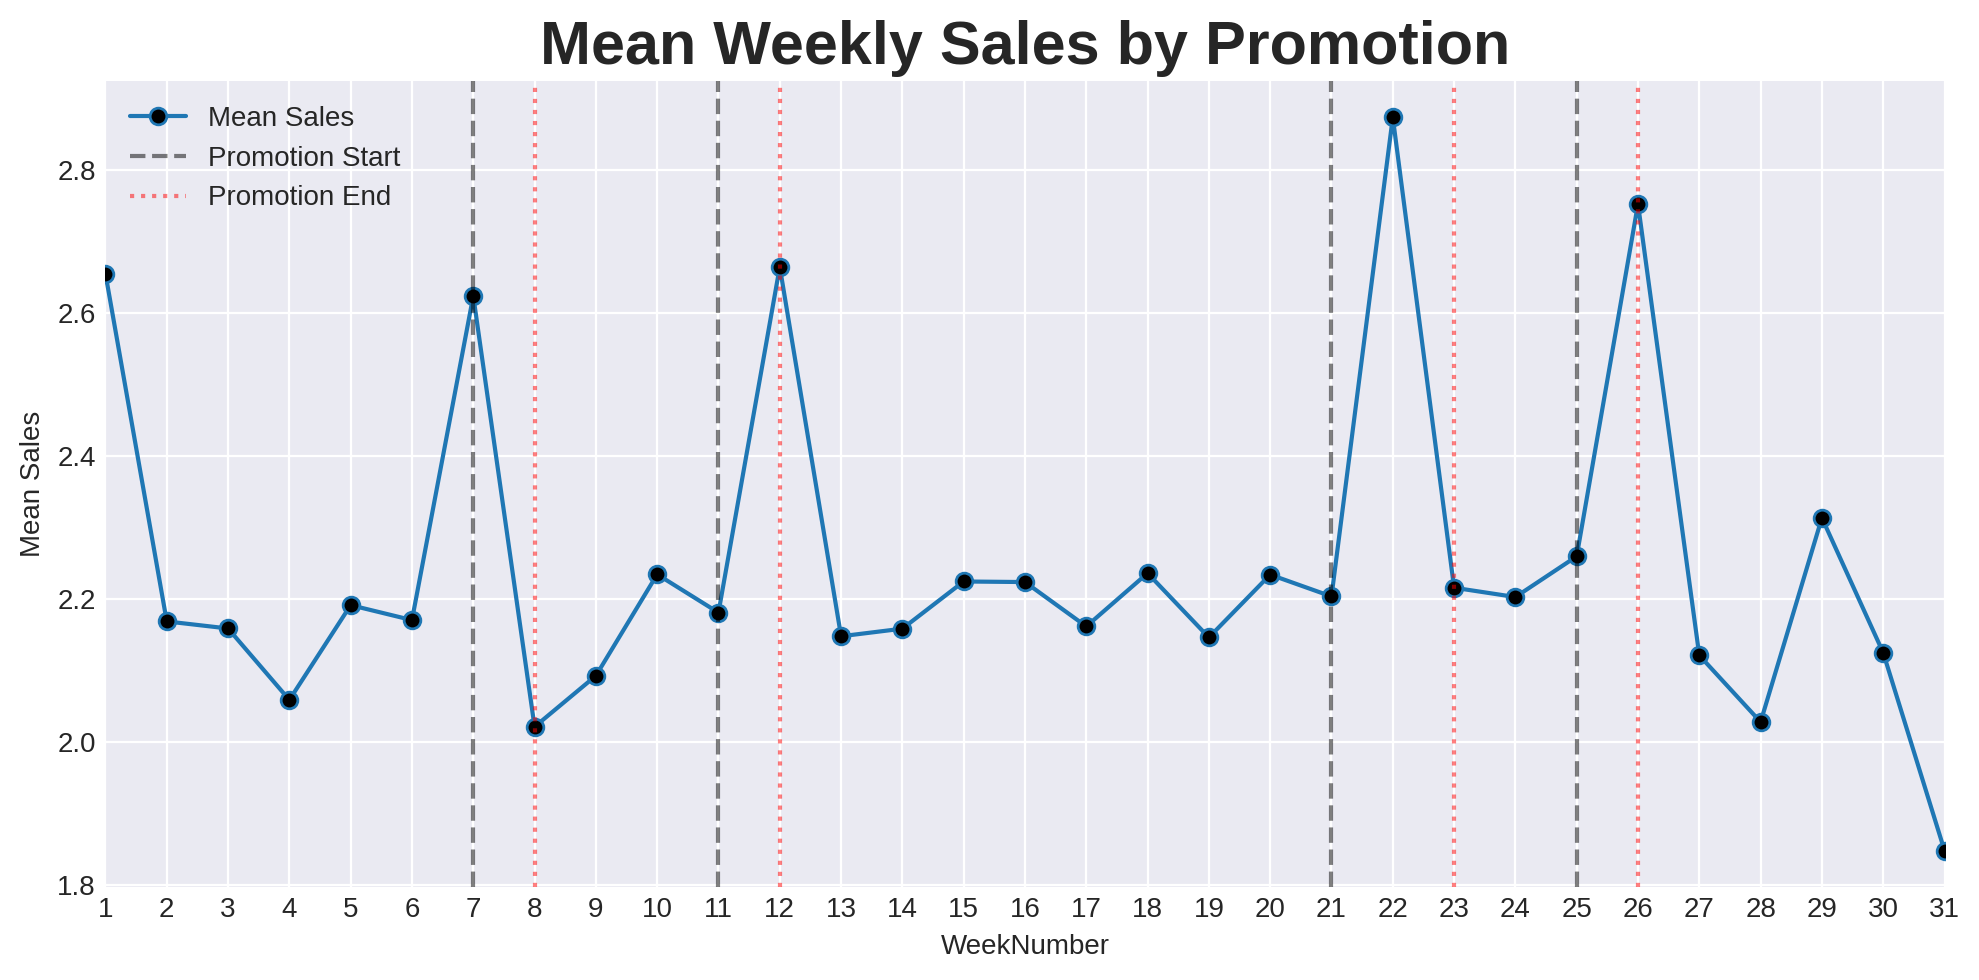

In [16]:
# Start and end week number values are ambigious.
# Therefore, we will plot mean weekly sales with promotion weeks:
fig = plt.figure(figsize=(10, 5), dpi=200)
ax = fig.add_subplot()
df1a[
    ['WeekNumber', 'SalesQuantity']
    ].groupby('WeekNumber').mean().plot(marker='o', mfc='k', ax=ax)

ax.set_ylabel('Mean Sales')
ax.set_title('Mean Weekly Sales by Promotion')
# For legend:
ax.axvline(-1, c='k', ls='--', label='Promotion Start', alpha=0.5)
ax.axvline(-1, c='r', ls=':', label='Promotion End', alpha=0.5)

# Loop all promotion start and end week values:
for start_x in df_promotion['StartWeekNumber']:
    ax.axvline(start_x, c='k', ls='--', alpha=0.5)

for end_x in df_promotion['EndWeekNumber']:
    ax.axvline(end_x, c='r', ls=':', alpha=0.5)
    
ax.set_xticks(ticks=range(1,48))
ax.set_xlim((1, 31))  # Limit x axis to first 31 weeks.
ax.legend(['Mean Sales', 'Promotion Start', 'Promotion End'])
fig.tight_layout()
plt.show()

Plot above shows the sale jump points during the promotion periods. We will define promo weeks using this information.

In [17]:
# Obtain no promo weeks:
promo_weeks = [7, 12, 22, 26]  # Promo weeks where sales jump.
promo_weeks

[7, 12, 22, 26]

In [18]:
# Generate is_promo column:
temp = lambda x: True if x in promo_weeks else False
df1a['IsPromoWeek'] = np.vectorize(temp)(df1a['WeekNumber'])
del temp
df1a['IsPromoWeek'].value_counts()

IsPromoWeek
False    1614390
True      259228
Name: count, dtype: int64

In [19]:
df_promotion

,Period,StartDate,EndDate,StartWeekNumber,EndWeekNumber
0,Promo1,2015-02-10,2015-02-17,7,8
1,Promo2,2015-03-15,2015-03-22,11,12
2,Promo3,2015-05-24,2015-06-01,21,23
3,Promo4,2015-06-21,2015-06-28,25,26
4,Promo5,2015-09-01,2015-09-06,36,36
5,Promo6,2015-11-20,2015-11-27,47,48


In [20]:
# Generate promo map using promo_weeks:
promo_map = {'IsPromo1': 7,
             'IsPromo2': 12,
             'IsPromo3': 22,
             'IsPromo4': 26}

In [21]:
# Generate distinct promotion week information:
for key, val in zip(promo_map.keys(),
                    promo_map.values()):
    
    df1a[key] = False
    df1a[key] = df1a['WeekNumber'].isin([val])
    
df1a.select_dtypes(include='bool').sum()

IsPromoWeek    259228
IsPromo1        67939
IsPromo2        75285
IsPromo3        56793
IsPromo4        59211
dtype: int64

Divide product and stores into 3 clusters each. Product with higher average weekly sale per store during non-promotion periods will be called “Fast items” and items with lower weekly average sale per store will be labeled as “Slow items”, items in between will be called “Medium items”. Grouping parameters selection is left to you. Apply similar approach to Stores as well.

In [22]:
df1a.columns

Index(['Date', 'StoreCode', 'ProductCode', 'SalesQuantity', 'WeekNumber',
       'WeekDay', 'IsPromoWeek', 'IsPromo1', 'IsPromo2', 'IsPromo3',
       'IsPromo4'],
      dtype='object')

In [23]:
df1a.head()

,Date,StoreCode,ProductCode,SalesQuantity,WeekNumber,WeekDay,IsPromoWeek,IsPromo1,IsPromo2,IsPromo3,IsPromo4
0,2015-01-01,8,9,-1,1,4,False,False,False,False,False
1,2015-01-01,131,9,1,1,4,False,False,False,False,False
2,2015-01-01,144,9,2,1,4,False,False,False,False,False
3,2015-01-01,203,9,2,1,4,False,False,False,False,False
4,2015-01-01,256,9,0,1,4,False,False,False,False,False


In [24]:
# Get the no promotion data:
df1a_no_promotion = df1a.query('IsPromoWeek == False')
df1a_no_promotion['IsPromoWeek'].sum()

0

In [25]:
# Check duplication of storecode:
df1a_no_promotion[['StoreCode']].duplicated().any()

True

In [26]:
# Check duplication of productcode:
df1a_no_promotion[['ProductCode']].duplicated().any()

True

Both store code and product code contains duplicate values.

**Clustering Products**

Clustering details are explaind in the report pdf.

In [27]:
# Find weekly mean sales for each product per store:
pivot_weekly_mean_sales = pd.pivot_table(data=df1a_no_promotion,
                                         values='SalesQuantity',
                                         columns='WeekNumber',
                                         index=['StoreCode','ProductCode'],
                                         aggfunc='mean',
                                         fill_value=0)

pivot_weekly_mean_sales

WeekNumber                1      2      3      4      5      6      8      9   \
StoreCode ProductCode                                                           
1         1           0.0000 4.0000 0.0000 1.0000 0.0000 0.0000 1.0000 0.0000   
          2           0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 4.0000 2.0000   
          3           0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 2.0000 0.0000   
          4           0.0000 0.0000 1.0000 1.0000 2.0000 1.0000 1.0000 1.0000   
          5           0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 4.0000 0.0000   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
340       313         0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
          314         0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
          315         0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
          316         1.0000 0.0000 0.0000 0.5000 0.0000 0.0000 0.0000 0.0000   
          317         0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000   

WeekNumber                10     11  ...     20     21     23     24     25  \
StoreCode ProductCode                ...                                      
1         1           0.0000 0.0000  ... 0.0000 0.0000 0.0000 0.0000 0.0000   
          2           0.0000 0.0000  ... 0.0000 2.0000 0.0000 0.0000 0.0000   
          3           0.5000 0.6667  ... 0.0000 4.0000 1.0000 0.0000 1.0000   
          4           0.0000 0.5000  ... 0.0000 0.0000 0.0000 0.0000 0.0000   
          5           4.0000 0.0000  ... 0.0000 0.0000 0.0000 0.0000 0.0000   
...                      ...    ...  ...    ...    ...    ...    ...    ...   
340       313         0.0000 0.0000  ... 6.0000 0.0000 1.6000 0.7500 1.6667   
          314         0.0000 0.0000  ... 0.0000 1.0000 0.0000 0.0000 0.0000   
          315         0.0000 0.0000  ... 0.0000 0.0000 0.0000 0.0000 0.0000   
          316         0.0000 0.0000  ... 1.0000 0.0000 0.0000 0.0000 0.0000   
          317         0.0000 0.0000  ... 0.0000 0.0000 0.0000 0.0000 0.0000   

WeekNumber                27     28     29      30     31  
StoreCode ProductCode                                      
1         1           0.0000 0.0000 0.0000 12.0000 0.0000  
          2           0.0000 0.0000 0.0000  0.0000 0.0000  
          3           0.0000 1.0000 0.0000  0.0000 0.0000  
          4           0.0000 0.0000 0.0000  0.0000 0.0000  
          5           0.0000 0.0000 0.0000  0.0000 0.0000  
...                      ...    ...    ...     ...    ...  
340       313         1.0000 2.0000 3.3333 12.0000 0.0000  
          314         0.0000 1.0000 1.0000  0.0000 0.0000  
          315         0.0000 0.0000 0.0000  0.0000 0.0000  
          316         0.0000 1.0000 0.0000  0.0000 0.0000  
          317         0.0000 0.0000 0.0000  0.0000 0.0000  

[82800 rows x 27 columns]

In [28]:
# Set loop variables:
unique_stores = (pivot_weekly_mean_sales.index
                 .get_level_values(level=0)
                 .unique())

weeks = df1a_no_promotion['WeekNumber'].unique()

# Define placeholders:
df_product_performance = []

# Loop all stores:
for store_code in unique_stores:
    
    # Loop weeks:
    for week_number in weeks:
        
        # obtain the target store_code/week_number pair:
        temp_df = pivot_weekly_mean_sales.xs(key=store_code,
                                             axis=0,
                                             level='StoreCode',
                                             drop_level=True)[week_number]
        
        # Generating temporary output df:
        temp_out_df = pd.DataFrame(columns=['store_code',
                                            'ProductCode',
                                            'WeekNumber',
                                            'ProductMeanSales',
                                            'WeekAverage'])

        # Mean of mean product sales for the week and store:
        temp_mean = temp_df.mean()
        
        # Populating the output df:
        temp_out_df['ProductCode'] = temp_df.reset_index()['ProductCode']
        temp_out_df['store_code'] = store_code
        temp_out_df['WeekNumber'] = week_number
        temp_out_df['ProductMeanSales'] = temp_df.values
        temp_out_df['WeekAverage'] = temp_mean
        
        # Add generated df to list:
        df_product_performance.append(temp_out_df)
        
        # Loop continues:
        del temp_df
        del temp_mean
        del temp_out_df
        continue

In [29]:
# Concat all performance dfs:
df_product_performance = pd.concat(objs=df_product_performance)
df_product_performance.head()

,store_code,ProductCode,WeekNumber,ProductMeanSales,WeekAverage
0,1,1,1,0.0000,0.3300
1,1,2,1,0.0000,0.3300
2,1,3,1,0.0000,0.3300
3,1,4,1,0.0000,0.3300
4,1,5,1,0.0000,0.3300


In [30]:
# Define labeling function:
def product_clustering_algorithm(mean_sales: float,
                                 week_mean: float) -> str:
    """Labels the product performace for each week"""
    
    # Fast item's logic:
    if mean_sales >= week_mean:
        return 2
    
    # Slow item's logic:
    elif mean_sales <= 0:
        return 0
    
    # Else in between values are average:
    else:
        return 1
    
# Vectorize product_label column:
df_product_performance['ProductLabel'] = \
    (np.vectorize(pyfunc=product_clustering_algorithm)
     (df_product_performance['ProductMeanSales'],
      df_product_performance['WeekAverage']))

In [31]:
# Average label value per product:
avg_label_value_product = df_product_performance[
    ['ProductCode','ProductLabel']
].groupby(by='ProductCode', as_index=False).mean()

def weighted_label_generator(label_value: int) -> str:
    """Calculate weighted label value for each product."""
    
    # Fast products' requirement:
    if label_value >= 1.33333333:
        return 'Fast'
    
    # Slow products' requirement
    elif label_value <= 0.66666667:
        return 'Slow'
    
    # Average products' requirement:
    else:
        return 'Average'
    
(avg_label_value_product
 ['WeightedProductLabel']) = (np.vectorize(weighted_label_generator)
                              (avg_label_value_product['ProductLabel']))

avg_label_value_product['WeightedProductLabel'].value_counts()

WeightedProductLabel
Slow       242
Average     65
Fast        10
Name: count, dtype: int64

In [32]:
avg_label_value_product.head()

,ProductCode,ProductLabel,WeightedProductLabel
0,1,0.5067,Slow
1,2,0.4387,Slow
2,3,0.4175,Slow
3,4,0.4000,Slow
4,5,0.4815,Slow


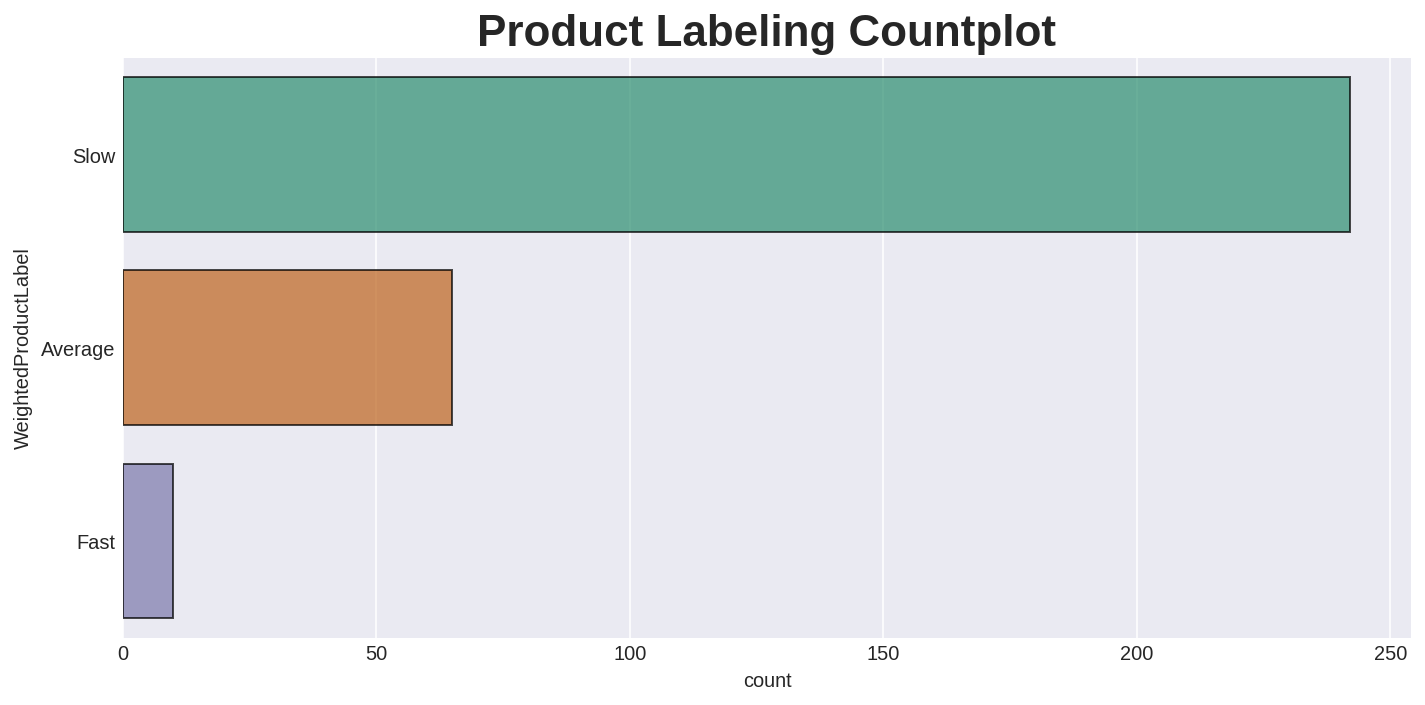

In [33]:
# Countplot of labels:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
sns.countplot(data=avg_label_value_product,
              y='WeightedProductLabel',
              hue='WeightedProductLabel',
              edgecolor='k',
              palette='Dark2',
              alpha=0.70,
              ax=ax)

ax.set_title('Product Labeling Countplot')
fig.tight_layout()
plt.show()

In [34]:
# Merge product information to the orgininal DataFrame:
df1a = pd.merge(left=df1a,
                right=avg_label_value_product[['ProductCode',
                                               'WeightedProductLabel']],
                how='left', on='ProductCode')

df1a.head()

,Date,StoreCode,ProductCode,SalesQuantity,WeekNumber,WeekDay,IsPromoWeek,IsPromo1,IsPromo2,IsPromo3,IsPromo4,WeightedProductLabel
0,2015-01-01,8,9,-1,1,4,False,False,False,False,False,Slow
1,2015-01-01,131,9,1,1,4,False,False,False,False,False,Slow
2,2015-01-01,144,9,2,1,4,False,False,False,False,False,Slow
3,2015-01-01,203,9,2,1,4,False,False,False,False,False,Slow
4,2015-01-01,256,9,0,1,4,False,False,False,False,False,Slow


Is there any significant difference between promotion impacts of the Fast
versus Slow items?

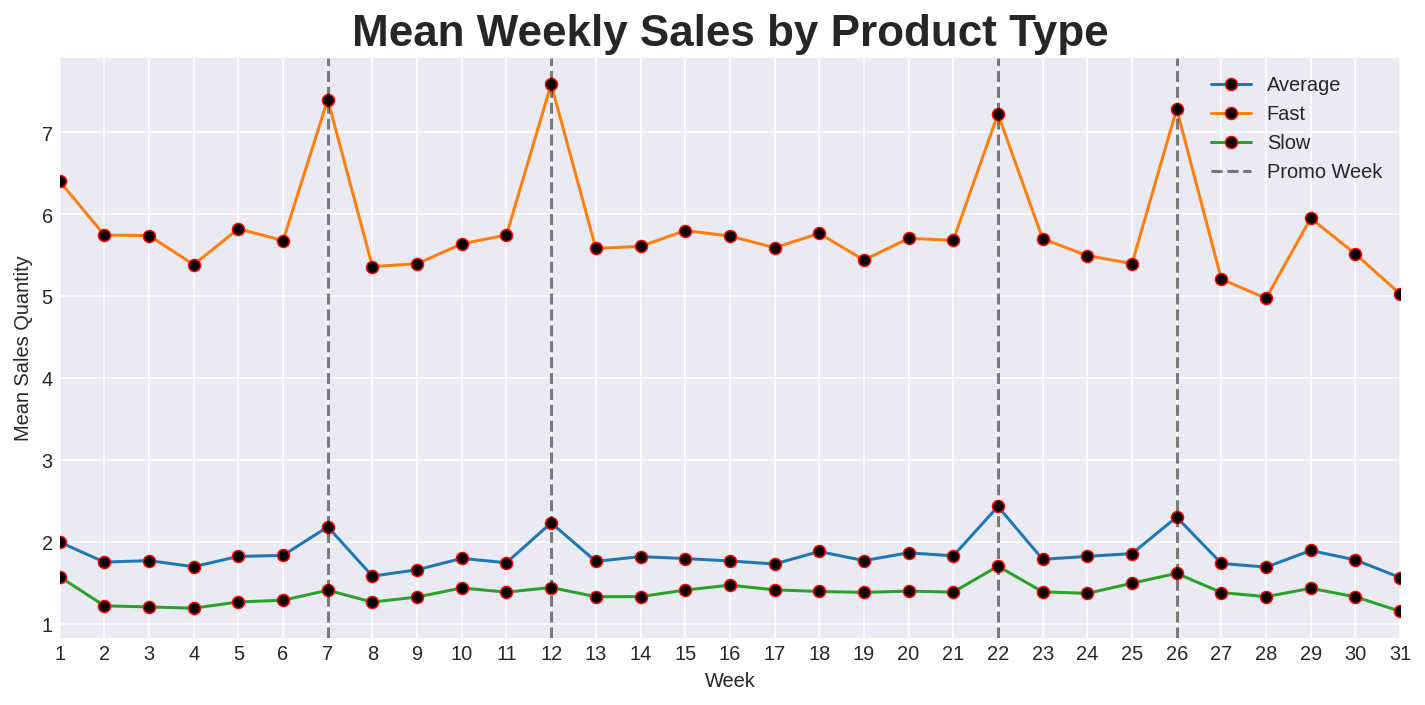

In [35]:
# Plotting promotion impact on the Fast, average and slow products:
temp = df1a[
    ['WeightedProductLabel', 'WeekNumber','SalesQuantity']
    ].groupby(by=['WeekNumber', 'WeightedProductLabel'],
              as_index=False).mean()

fig =plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
sns.lineplot(data=temp,
             x='WeekNumber',
             y='SalesQuantity',
             hue='WeightedProductLabel',
             marker='o',
             mfc='k',
             mec='r',
             ax=ax)

ax.axvline(-1, ls='--', color='k', label='Promo Week', alpha=0.50)  # Legend
for x in promo_weeks:
    ax.axvline(x, ls='--', color='k', alpha=0.50)
    
ax.set_xlabel('Week')
ax.set_xticks(range(1, 32))
ax.set_ylabel('Mean Sales Quantity')
ax.set_title('Mean Weekly Sales by Product Type')
ax.legend()
ax.set_xlim((1, 31))
fig.tight_layout()
plt.show()

Plot above shows that fast items have the most sensitivity to the promotion weeks. On the other hand, slow items had the least reaction to hte promotion days.

Which items experienced the biggest sale increase during promotions?

In [36]:
# Find weekly total sales for each product:
pivot_weekly_total_sales = pd.pivot_table(data=df1a,
                                         values='SalesQuantity',
                                         columns='WeekNumber',
                                         index=['ProductCode'],
                                         aggfunc='sum',
                                         fill_value=0)

pivot_weekly_total_sales

WeekNumber,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
ProductCode,,,,,,,,,,,,,,,,,,,,,
1,203,343,395,245,392,411,416,340,406,387,...,301,415,289,384,518,294,358,423,367,234
2,117,248,298,206,304,319,301,255,292,332,...,392,266,174,252,277,320,277,213,278,173
3,104,227,165,201,223,137,278,191,253,267,...,261,211,175,174,254,218,241,204,267,132
4,139,279,338,187,210,281,275,245,251,305,...,254,277,245,238,215,151,267,349,239,232
5,163,370,278,233,395,314,327,369,316,302,...,276,322,270,218,369,296,325,265,308,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0,0,0,0,0,0,0,0,0,0,...,558,557,450,519,427,415,467,667,650,322
314,2,8,13,11,10,18,26,17,17,17,...,45,49,47,45,30,23,55,29,31,27
315,12,22,11,13,21,13,25,21,25,14,...,24,32,14,18,25,17,11,12,7,17


In [37]:
# Get Response rates of products to the advertisement:
# Generate response df:
df_advertisement_response = pd.DataFrame(index=pivot_weekly_total_sales.index)
df_advertisement_response['Promo1Response'] = 0
df_advertisement_response['Promo2Response'] = 0
df_advertisement_response['Promo3Response'] = 0
df_advertisement_response['Promo4Response'] = 0

# Percentage change function:
pct_change = (lambda product, week:
    ((pivot_weekly_total_sales.loc[product][week]
     - pivot_weekly_total_sales.loc[product][week - 1])
     / pivot_weekly_total_sales.loc[product][week - 1]))

for product in pivot_weekly_total_sales.index:
    for (alias, week) in zip(['Promo1Response',
                              'Promo2Response',
                              'Promo3Response',
                              'Promo4Response'],promo_weeks):
        
        # Calculate promo response rates:
        df_advertisement_response.at[product, alias] = (
            pct_change(product, week) * 100
        )

df_advertisement_response = df_advertisement_response.fillna(0)

In [38]:
# Get average promotion response rate:
target = [f'Promo{i}Response' for i in range(1, 5)]
df_advertisement_response['AverageResponseRate'] = (
    df_advertisement_response[target].mean(axis=1))

df_advertisement_response['STDResponseRate'] = (
    df_advertisement_response[target].std(axis=1))

df_advertisement_response.head()

,Promo1Response,Promo2Response,Promo3Response,Promo4Response,AverageResponseRate,STDResponseRate
ProductCode,,,,,,
1,1.2165,-0.6424,-7.6687,34.8958,6.9503,19.0192
2,-5.6426,62.0253,35.6401,9.9206,25.4859,29.7181
3,102.9197,53.6458,80.0000,45.9770,70.6356,25.9914
4,-2.1352,23.4234,58.7500,-9.6639,17.5936,30.8763
5,4.1401,21.2903,9.0909,69.2661,25.9469,29.7652


In [39]:
# Detect stores with high response on average:
df_advertisement_response_success = (
    df_advertisement_response[
    (df_advertisement_response['AverageResponseRate'] > 50)
    & (df_advertisement_response['AverageResponseRate'] != np.inf)])

for product in df_advertisement_response_success.index:
    print(product, end=', ')

3, 20, 21, 22, 24, 48, 53, 59, 61, 62, 66, 67, 71, 99, 122, 152, 185, 186, 188, 205, 207, 208, 209, 210, 213, 214, 215, 217, 218, 219, 220, 221, 222, 236, 237, 239, 248, 260, 268, 278, 282, 289, 290, 299, 302, 303, 317, 

In [40]:
# Sucessful and stable products during promotions:
df_advertisement_response_success[
    (df_advertisement_response_success['AverageResponseRate']
     >= df_advertisement_response_success['STDResponseRate'])
]

,Promo1Response,Promo2Response,Promo3Response,Promo4Response,AverageResponseRate,STDResponseRate
ProductCode,,,,,,
3,102.9197,53.6458,80.0000,45.9770,70.6356,25.9914
21,57.5758,90.6250,95.8333,-21.0526,55.7454,53.9287
24,52.7473,94.1176,27.5862,54.8387,57.3225,27.4787
59,20.9302,114.8148,128.2609,12.7660,69.1930,60.7829
66,300.0000,200.0000,90.0000,35.2941,156.3235,117.7533
71,92.1875,107.0175,14.1361,19.3662,58.1768,48.2631
185,84.0979,78.1726,28.5199,32.9023,55.9232,29.2675
186,89.7241,83.5431,29.7601,41.2826,61.0775,29.9886
188,117.5824,49.8039,10.2819,54.5842,58.0631,44.3693


**Clustering Stores**  

In [41]:
# Find weekly mean sales for each store:
pivot_weekly_mean_store_sales = pd.pivot_table(data=df1a_no_promotion,
                                               values='SalesQuantity',
                                               columns='WeekNumber',
                                               index='StoreCode',
                                               aggfunc='mean',
                                               fill_value=0)

pivot_weekly_mean_store_sales

WeekNumber,1,2,3,4,5,6,8,9,10,11,...,20,21,23,24,25,27,28,29,30,31
StoreCode,,,,,,,,,,,,,,,,,,,,,
1,2.7442,2.6022,1.9560,2.2191,2.9110,1.7537,1.9741,2.5435,1.9272,2.4450,...,2.3119,1.9044,1.4226,2.0198,1.7486,2.2672,2.2262,1.7132,2.8940,1.5175
2,3.6505,3.6084,3.0324,3.0097,2.6044,2.9000,2.9439,3.2889,3.1233,3.2191,...,3.5978,3.0263,3.2462,3.0296,2.8508,3.4942,2.3454,2.9373,3.5550,2.5898
3,2.3333,1.3077,1.9493,2.1574,1.8357,1.2756,0.9383,1.3041,1.9286,1.7233,...,1.2349,1.7677,1.8759,1.4641,1.7167,1.7000,2.0709,1.7313,1.7500,1.7059
4,1.1986,1.9101,1.7176,1.8000,1.8794,2.2325,1.8256,2.3846,1.8360,1.6509,...,2.2816,2.5657,2.4551,1.4970,2.1357,1.5956,1.6154,2.3973,1.8950,1.9918
5,2.5455,1.5419,1.6383,1.6477,1.5895,1.7584,1.1216,1.3398,2.1705,2.2154,...,1.5163,1.2132,1.5500,2.6482,1.2360,1.9617,1.4167,1.8323,1.9545,2.1620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2.7945,1.4824,1.2291,2.6852,1.6464,2.3407,1.2400,1.7330,1.7149,1.2846,...,2.3317,1.4206,1.8128,1.7072,1.8796,1.5299,1.5924,1.6059,1.6726,1.2254
337,2.4200,1.5362,2.5198,1.6847,1.4683,2.3069,2.5830,2.0800,2.2140,2.0551,...,2.2450,1.4017,2.0000,2.4800,1.7734,1.5723,1.5750,2.4536,2.0425,1.7571
338,2.1538,1.8970,2.2635,1.5635,2.6667,1.6194,1.9760,1.7143,1.8625,2.8385,...,2.5433,2.1429,1.8462,1.8137,1.7563,1.8917,2.1872,2.4570,1.6968,1.0111


In [42]:
# Generate store performance metrics:
# Set loop variables:
weeks = df1a_no_promotion['WeekNumber'].unique()
# Define placeholders:
df_store_performance = []

# Loop weeks:
for week_number in weeks:
    
    # obtain the target store_code/week_number pair:
    temp_df = pivot_weekly_mean_sales.xs(key=store_code,
                                         axis=0,
                                         level='StoreCode',
                                         drop_level=True)[week_number]

In [43]:
# Generate store performance metrics:
# Set loop variables:
weeks = df1a_no_promotion['WeekNumber'].unique()

# Define placeholders:
df_store_performance = []

# Loop weeks:
for week_number in weeks:
    
    # obtain the target week:
    temp_df = pivot_weekly_mean_store_sales[week_number]
    
    # Generating temporary output df:
    temp_out_df = pd.DataFrame(columns=['StoreCode',
                                        'WeekNumber',
                                        'StoreMeanSales'])    
    
    # Populating the output df:
    temp_out_df['StoreCode'] = pivot_weekly_mean_store_sales.index
    temp_out_df['WeekNumber'] = week_number
    temp_out_df['StoreMeanSales'] = temp_df.values
    
    # Add generated df to list:
    df_store_performance.append(temp_out_df)
    
    # Loop continues:
    del temp_df
    del temp_out_df
    continue

In [44]:
# Combine store performance df:
df_store_performance = pd.concat(df_store_performance)
df_store_performance['StoreMeanSales'].describe()

count   9180.0000
mean       2.0553
std        0.8034
min        0.0000
25%        1.5740
50%        1.9718
75%        2.4767
max        7.6271
Name: StoreMeanSales, dtype: float64

In [45]:
# Define store labeling function:
def store_clustering_algorithm(mean_sales: float) -> int:
    """Labels the store performace for each week"""
    
    # Fast item's logic:
    if mean_sales >= 2.4767:
        return 2
    
    # Slow item's logic:
    elif mean_sales <= 1.5740:
        return 0
    
    # Else in between values are average:
    else:
        return 1
    
# Vectorize product_label column:
df_store_performance['StoreLabel'] = (
    (np.vectorize(pyfunc=store_clustering_algorithm)
     (df_store_performance['StoreMeanSales']))
)

df_store_performance.head()

,StoreCode,WeekNumber,StoreMeanSales,StoreLabel
0,1,1,2.7442,2
1,2,1,3.6505,2
2,3,1,2.3333,1
3,4,1,1.1986,0
4,5,1,2.5455,2


In [46]:
# Average label value per store:
avg_label_value_store = df_store_performance[
    ['StoreCode','StoreLabel']
].groupby(by='StoreCode', as_index=False).mean()

def weighted_label_generator(label_value: int) -> str:
    """Calculate weighted label value for each store."""
    
    # Fast store' requirement:
    if label_value >= 1.33333333:
        return 'Fast'
    
    # Slow store' requirement
    elif label_value <= 0.66666667:
        return 'Slow'
    
    # Average store' requirement:
    else:
        return 'Average'
    
(avg_label_value_store
 ['WeightedStoreLabel']) = (np.vectorize(weighted_label_generator)
                              (avg_label_value_store['StoreLabel']))

avg_label_value_store['WeightedStoreLabel'].value_counts()

WeightedStoreLabel
Average    177
Slow        89
Fast        74
Name: count, dtype: int64

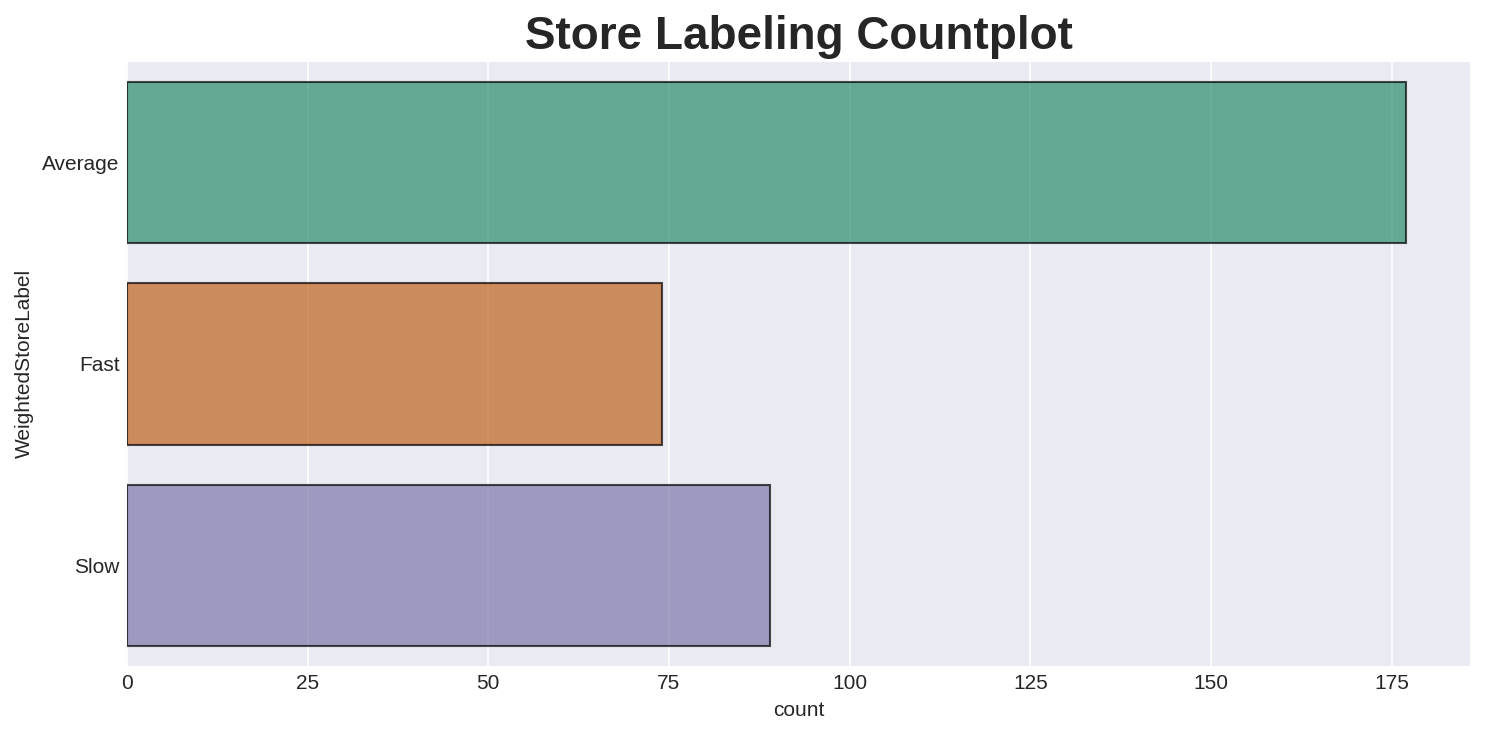

In [47]:
# Countplot of labels:
fig = plt.figure(figsize=(10, 5), dpi=150)
ax = fig.add_subplot()
sns.countplot(data=avg_label_value_store,
              y='WeightedStoreLabel',
              hue='WeightedStoreLabel',
              edgecolor='k',
              palette='Dark2',
              alpha=0.70,
              ax=ax)

ax.set_title('Store Labeling Countplot')
fig.tight_layout()
plt.show()

In [48]:
# Merge product information to the orgininal DataFrame:
df1a = pd.merge(left=df1a,
                right=avg_label_value_store[['StoreCode',
                                             'WeightedStoreLabel']],
                how='left', on='StoreCode')

df1a.head()

,Date,StoreCode,ProductCode,SalesQuantity,WeekNumber,WeekDay,IsPromoWeek,IsPromo1,IsPromo2,IsPromo3,IsPromo4,WeightedProductLabel,WeightedStoreLabel
0,2015-01-01,8,9,-1,1,4,False,False,False,False,False,Slow,Average
1,2015-01-01,131,9,1,1,4,False,False,False,False,False,Slow,Average
2,2015-01-01,144,9,2,1,4,False,False,False,False,False,Slow,Slow
3,2015-01-01,203,9,2,1,4,False,False,False,False,False,Slow,Slow
4,2015-01-01,256,9,0,1,4,False,False,False,False,False,Slow,Fast


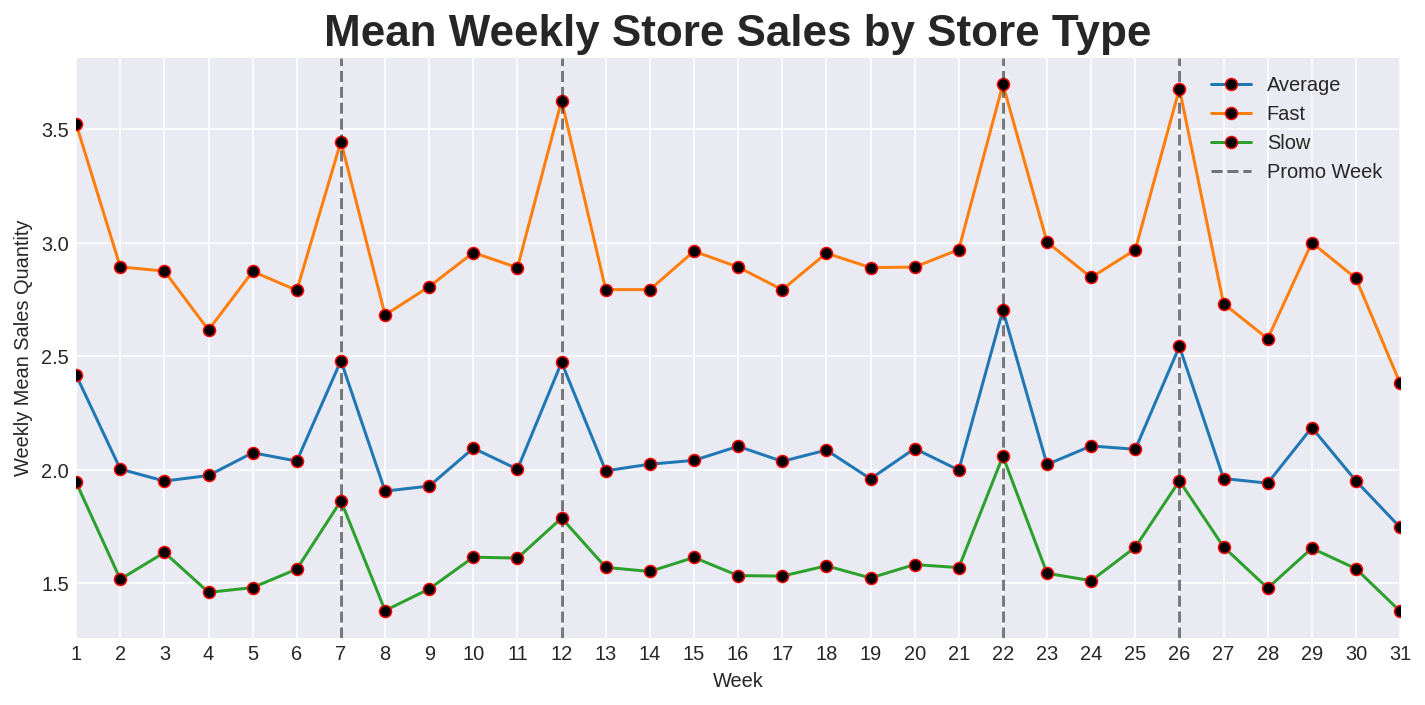

In [49]:
# Plotting promotion impact on the Fast, average and slow products:
temp = df1a[
    ['WeightedStoreLabel', 'WeekNumber','SalesQuantity']
    ].groupby(by=['WeekNumber', 'WeightedStoreLabel'],
              as_index=False).mean()

fig =plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
sns.lineplot(data=temp,
             x='WeekNumber',
             y='SalesQuantity',
             hue='WeightedStoreLabel',
             marker='o',
             mfc='k',
             mec='r',
             ax=ax)

ax.axvline(-1, ls='--', color='k', label='Promo Week', alpha=0.50)  # Legend
for x in promo_weeks:
    ax.axvline(x, ls='--', color='k', alpha=0.50)
    
ax.set_xlabel('Week')
ax.set_xticks(range(1, 32))
ax.set_ylabel('Weekly Mean Sales Quantity')
ax.set_title('Mean Weekly Store Sales by Store Type')
ax.legend()
ax.set_xlim((1, 31))
fig.tight_layout()
plt.show()

In [50]:
# Find weekly total sales for each store:
pivot_weekly_total_store_sales = pd.pivot_table(data=df1a,
                                         values='SalesQuantity',
                                         columns='WeekNumber',
                                         index='StoreCode',
                                         aggfunc='sum',
                                         fill_value=0)

pivot_weekly_total_store_sales

WeekNumber,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
StoreCode,,,,,,,,,,,,,,,,,,,,,
1,118,471,311,395,556,356,451,381,468,397,...,551,340,408,320,385,263,374,233,437,173
2,679,1382,1310,1237,1185,1334,2079,1154,1480,1368,...,1204,1292,1124,1223,1749,1202,842,1172,1358,764
3,70,136,269,233,257,162,401,289,283,432,...,393,257,224,206,273,221,263,232,217,203
4,175,361,371,243,483,509,918,471,589,459,...,414,410,253,425,433,292,294,537,379,243
5,140,350,308,290,364,313,551,249,276,471,...,454,248,527,199,414,359,255,295,301,307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,204,295,279,435,461,316,652,310,357,379,...,454,339,379,359,374,205,250,273,281,174
337,242,318,572,497,370,436,740,638,520,569,...,492,388,434,360,575,272,315,449,433,311
338,168,313,378,197,464,217,403,411,348,298,...,456,408,292,346,634,297,444,457,375,182


In [51]:
# Get Response rates of stores to the advertisement:
# Generate response df:
df_advertisement_response_store = (
    pd.DataFrame(index=pivot_weekly_total_store_sales.index)
)

df_advertisement_response_store['Promo1Response'] = 0
df_advertisement_response_store['Promo2Response'] = 0
df_advertisement_response_store['Promo3Response'] = 0
df_advertisement_response_store['Promo4Response'] = 0

# Percentage change function:
pct_change = (lambda store, week:
    ((pivot_weekly_total_store_sales.loc[store][week]
     - pivot_weekly_total_store_sales.loc[store][week - 1])
     / pivot_weekly_total_store_sales.loc[store][week - 1]))

for store in pivot_weekly_total_store_sales.index:
    for (alias, week) in zip(['Promo1Response',
                              'Promo2Response',
                              'Promo3Response',
                              'Promo4Response'], promo_weeks):
        
        # Calculate promo response rates:
        df_advertisement_response_store.at[store, alias] = (
            pct_change(store, week) * 100
        )

df_advertisement_response_store = df_advertisement_response_store.fillna(0)
df_advertisement_response_store

,Promo1Response,Promo2Response,Promo3Response,Promo4Response
StoreCode,,,,
1,26.6854,18.2004,6.3707,20.3125
2,55.8471,13.6153,-12.9429,43.0090
3,147.5309,12.9577,43.4307,32.5243
4,80.3536,139.1429,-7.7951,1.8824
5,76.0383,-9.2593,175.1515,108.0402
...,...,...,...,...
336,106.3291,52.8481,37.1601,4.1783
337,69.7248,36.7816,53.2710,59.7222
338,85.7143,-25.6881,1.3333,83.2370


In [52]:
# Get average promotion response rate:
target = [f'Promo{i}Response' for i in range(1, 5)]
df_advertisement_response_store['AverageResponseRate'] = (
    df_advertisement_response_store[target].mean(axis=1))

df_advertisement_response_store['STDResponseRate'] = (
    df_advertisement_response_store[target].std(axis=1))

df_advertisement_response_store.head()

,Promo1Response,Promo2Response,Promo3Response,Promo4Response,AverageResponseRate,STDResponseRate
StoreCode,,,,,,
1,26.6854,18.2004,6.3707,20.3125,17.8922,8.4857
2,55.8471,13.6153,-12.9429,43.0090,24.8821,30.7955
3,147.5309,12.9577,43.4307,32.5243,59.1109,60.2797
4,80.3536,139.1429,-7.7951,1.8824,53.3959,69.4676
5,76.0383,-9.2593,175.1515,108.0402,87.4927,76.5907


In [53]:
# Detect stores with high response on average:
df_advertisement_response_success_store = (
    df_advertisement_response_store[
    (df_advertisement_response_store['AverageResponseRate'] > 75)
    & (df_advertisement_response_store['AverageResponseRate'] != np.inf)])


for store in df_advertisement_response_success_store.index:
     print(store, end=', ')

5, 12, 30, 44, 54, 61, 65, 82, 84, 117, 143, 155, 183, 188, 200, 207, 210, 225, 248, 256, 277, 284, 312, 332, 

In [54]:
# Sucessful and stable stores during promotions:
df_advertisement_response_success_store[
    (df_advertisement_response_store['AverageResponseRate']
     >= df_advertisement_response_store['STDResponseRate'])
]

,Promo1Response,Promo2Response,Promo3Response,Promo4Response,AverageResponseRate,STDResponseRate
StoreCode,,,,,,
5,76.0383,-9.2593,175.1515,108.0402,87.4927,76.5907
12,163.8418,96.4000,14.4487,52.0362,81.6817,64.2029
30,191.4573,-31.3901,120.2247,115.5405,98.9581,93.5842
44,169.1358,-10.0000,87.8788,95.0495,85.5160,73.5120
54,24.7967,70.0000,86.3354,206.2857,96.8545,77.4582
65,59.0686,166.8770,74.0909,85.4701,96.3766,48.2279
82,124.7368,12.1771,101.4388,69.3252,76.9195,48.7748
84,12.4629,57.1930,79.7297,195.8955,86.3203,78.2165
117,80.2111,59.0057,110.9859,74.1497,81.0881,21.8359


We will show some other exploratory data analysis plots for broaden our understanding.

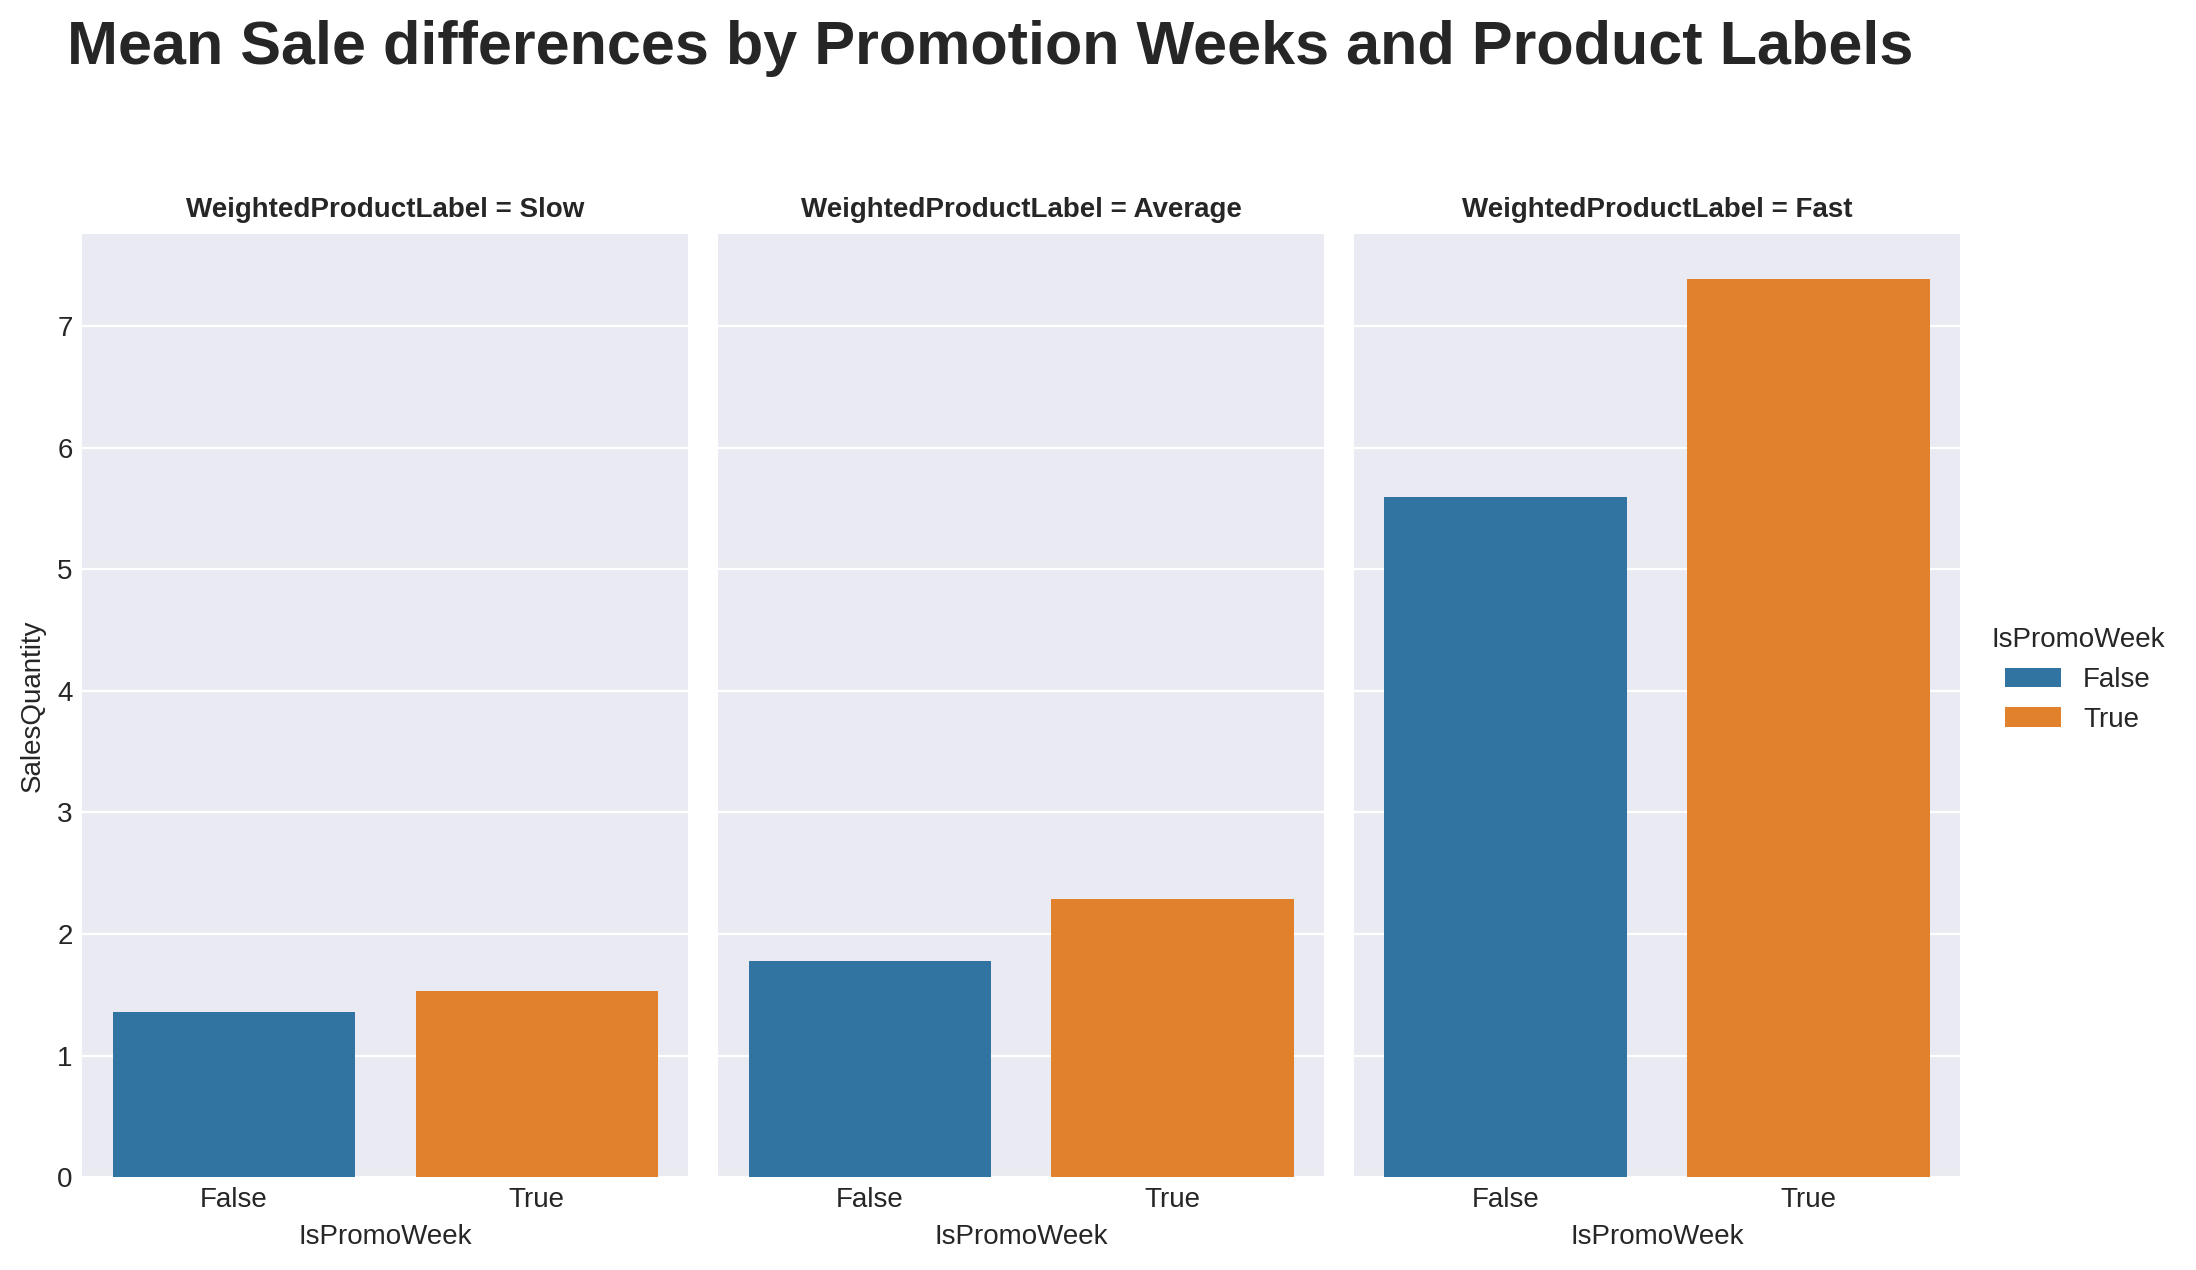

In [55]:
# General Promo week sale differences for products:
cat_plot = sns.catplot(data=df1a,
                     x='IsPromoWeek',
                     y='SalesQuantity',
                     estimator='mean',
                     kind='bar',
                     hue='IsPromoWeek',
                     col='WeightedProductLabel',
                     legend_out=True,
                     errorbar=None)

cat_plot.figure.set_size_inches(10, 5)
cat_plot._legend.remove()
cat_plot.add_legend(title='IsPromoWeek',
                    bbox_to_anchor=(1.1, 0.5))

cat_plot.figure.set_dpi(200)
cat_plot.figure.set_size_inches(10, 6)
cat_plot.figure.tight_layout()
(
    cat_plot
    .figure
    .suptitle('Mean Sale differences by Promotion Weeks and Product Labels',
                y=1.05)
)
cat_plot.figure.tight_layout()
plt.show()

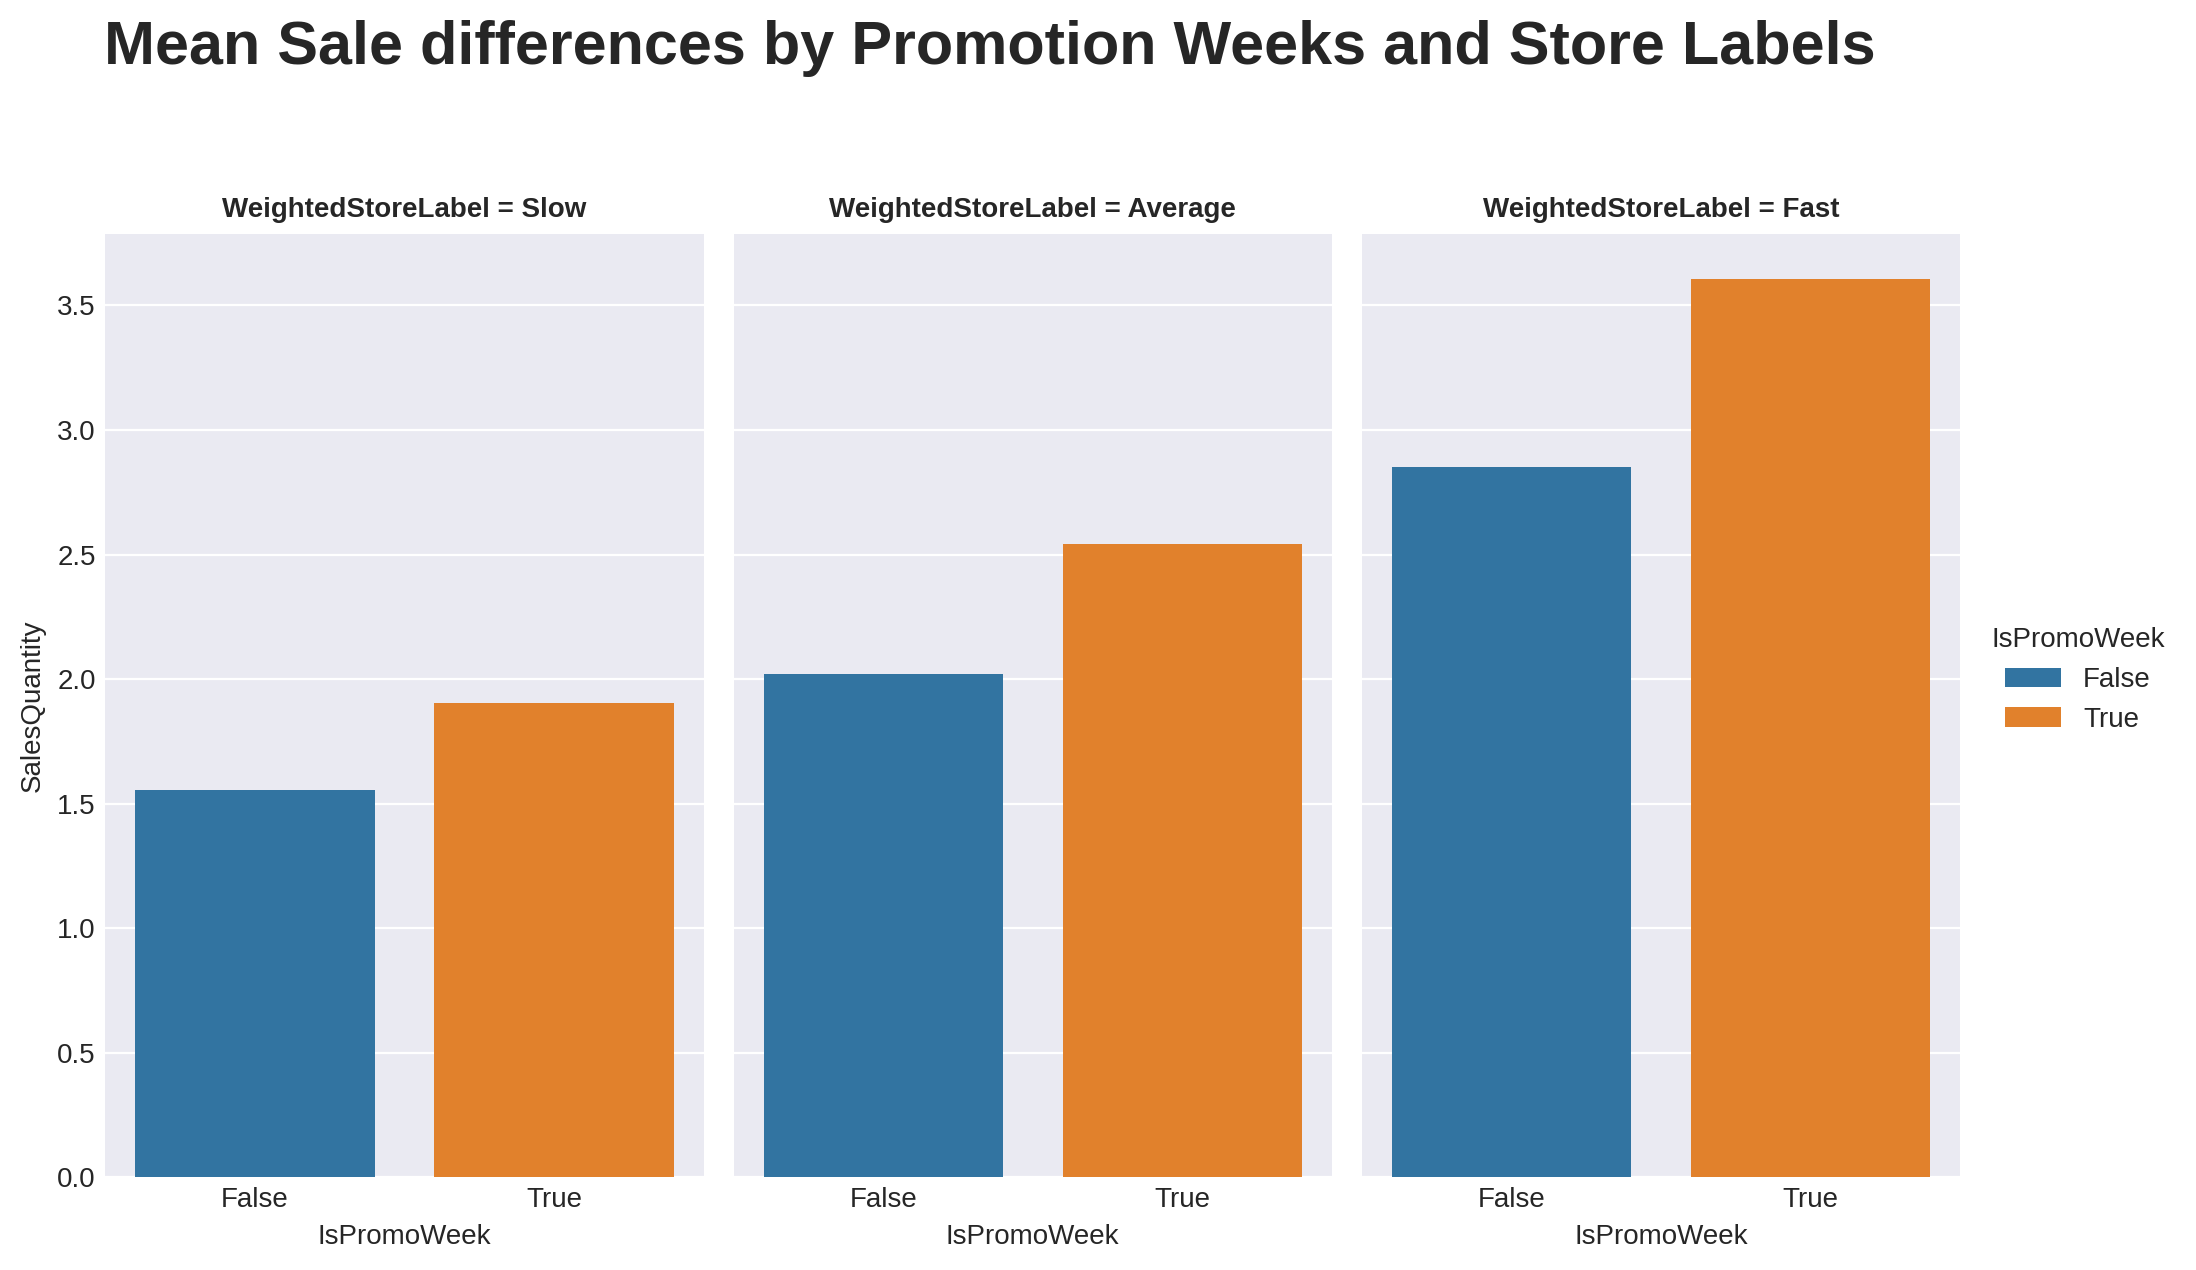

In [56]:
# General Promo week sale differences for stores:
cat_plot = sns.catplot(data=df1a,
                     x='IsPromoWeek',
                     y='SalesQuantity',
                     estimator='mean',
                     kind='bar',
                     hue='IsPromoWeek',
                     col='WeightedStoreLabel',
                     col_order=['Slow', 'Average', 'Fast'],
                     legend_out=True,
                     errorbar=None)

cat_plot.figure.set_size_inches(10, 5)
cat_plot._legend.remove()
cat_plot.add_legend(title='IsPromoWeek',
                    bbox_to_anchor=(1.1, 0.5))

cat_plot.figure.set_dpi(200)
cat_plot.figure.set_size_inches(10, 6)
(
    cat_plot
    .figure
    .suptitle('Mean Sale differences by Promotion Weeks and Store Labels',
                y=1.05)
)
cat_plot.figure.tight_layout()
plt.show()

In [57]:
df1a.columns

Index(['Date', 'StoreCode', 'ProductCode', 'SalesQuantity', 'WeekNumber',
       'WeekDay', 'IsPromoWeek', 'IsPromo1', 'IsPromo2', 'IsPromo3',
       'IsPromo4', 'WeightedProductLabel', 'WeightedStoreLabel'],
      dtype='object')

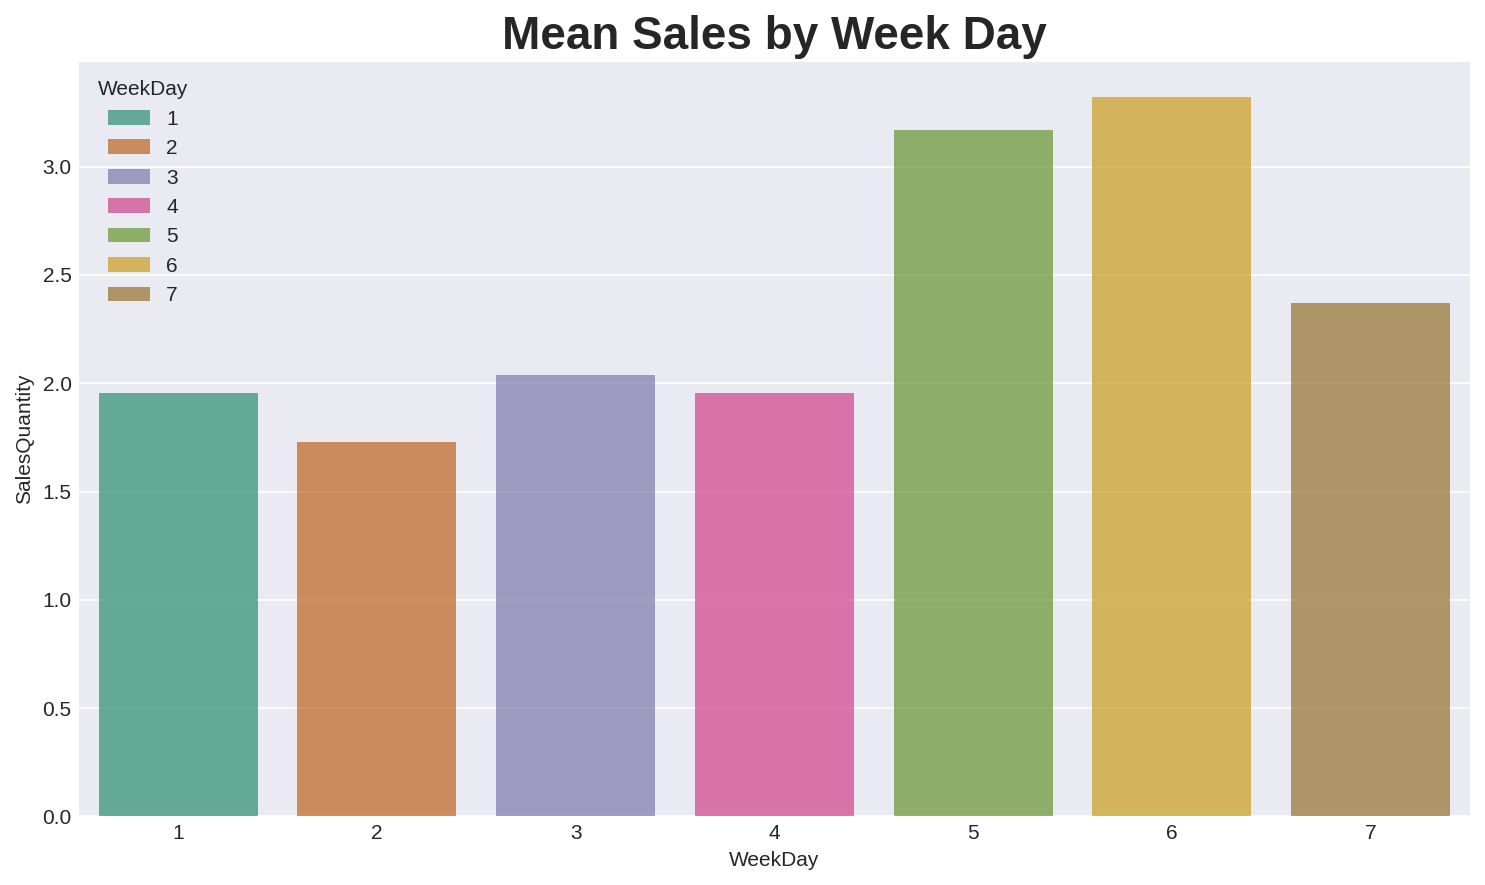

In [58]:
# Mean sales by weekdays:
temp = (
    df1a[
    ['WeekDay', 'SalesQuantity']
    ].groupby(by='WeekDay', as_index=False).mean()
)
plt.figure(figsize=(10, 6), dpi=150)
sns.barplot(data=temp,
            x='WeekDay',
            y='SalesQuantity',
            hue='WeekDay',
            palette='Dark2',
            alpha=0.70)

plt.title('Mean Sales by Week Day')
plt.tight_layout()
plt.show()

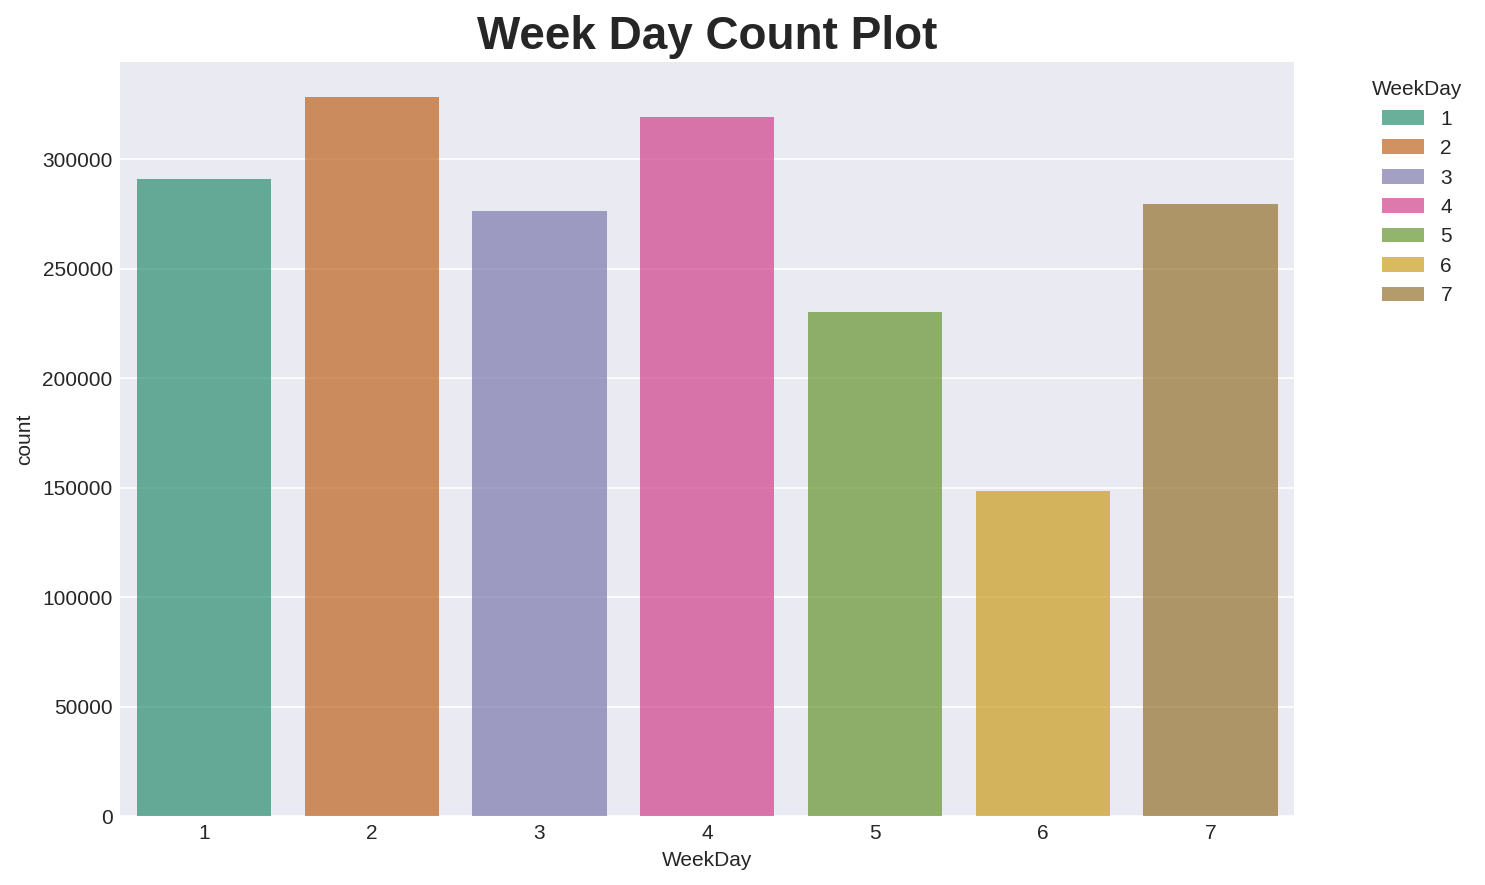

In [59]:
# Weekday count plot:
plt.figure(figsize=(10, 6), dpi=150)
sns.countplot(data=df1a,
            x='WeekDay',
            hue='WeekDay',
            palette='Dark2',
            alpha=0.70)

plt.title('Week Day Count Plot')
plt.legend(title='WeekDay',
    bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

In [60]:
# Average returns after each promotion:
post_promo_weeks = [week + 1 for week in promo_weeks]

# Average returns during 
temp = df1a.copy()
temp['PostPromo'] = (
    np.vectorize(lambda week: True if week in post_promo_weeks else False)
    (temp['WeekNumber'])
)

temp = temp.query('SalesQuantity < 0')
temp[
['PostPromo', 'SalesQuantity']
].groupby(by='PostPromo').mean()

,SalesQuantity
PostPromo,
False,-2.1065
True,-2.2424


## MACHINE LEARNING  DATA PREPARATION

In this notebook we will only prepare the train and test data for the machine learning. We will write the machine learning code in another notebook.

In [61]:
# Define label dfs for merging:
# Products:
product_labels = (
    df1a[
    ['ProductCode', 'WeightedProductLabel']
    ].groupby('ProductCode', as_index=False).first()
)

product_labels

,ProductCode,WeightedProductLabel
0,1,Slow
1,2,Slow
2,3,Slow
3,4,Slow
4,5,Slow
...,...,...
312,313,Slow
313,314,Slow
314,315,Slow
315,316,Slow


In [62]:
# Store labels:
store_labels = (
    df1a[
    ['StoreCode', 'WeightedStoreLabel']
    ].groupby('StoreCode', as_index=False).first()
)

store_labels

,StoreCode,WeightedStoreLabel
0,1,Average
1,2,Fast
2,3,Average
3,4,Average
4,5,Slow
...,...,...
335,336,Average
336,337,Average
337,338,Average
338,339,Average


In [63]:
# Week labels:
week_labels = (
    df1a[
    ['WeekNumber', 'IsPromoWeek']
    ].groupby('WeekNumber', as_index=False).first()
)

week_labels

,WeekNumber,IsPromoWeek
0,1,False
1,2,False
2,3,False
3,4,False
4,5,False
5,6,False
6,7,True
7,8,False
8,9,False
9,10,False


In [64]:
# Generate train data:
train = (
    df1a[
    ['WeekNumber',
     'StoreCode',
     'ProductCode',
     'SalesQuantity']
    ]
)

train.head()

,WeekNumber,StoreCode,ProductCode,SalesQuantity
0,1,8,9,-1
1,1,131,9,1
2,1,144,9,2
3,1,203,9,2
4,1,256,9,0


In [65]:
# Group by store and product per week:
train = (
    train
    .groupby(by=['WeekNumber', 'StoreCode', 'ProductCode'], as_index=False)
    .mean()
)

train

,WeekNumber,StoreCode,ProductCode,SalesQuantity
0,1,1,40,1.0000
1,1,1,41,1.0000
2,1,1,46,1.0000
3,1,1,47,1.0000
4,1,1,79,1.0000
...,...,...,...,...
1052909,31,340,307,2.0000
1052910,31,340,308,2.0000
1052911,31,340,312,1.0000
1052912,31,340,313,0.0000


In [66]:
# Merge label information:
train = (
    pd.merge(left=train,
             right=product_labels,
             on='ProductCode',
             how='left')
)

train = (
   pd.merge(left=train,
            right=store_labels,
            on='StoreCode',
            how='left') 
)

train = (
   pd.merge(left=train,
            right=week_labels,
            on='WeekNumber',
            how='left') 
)

train = train.drop(columns=['WeekNumber', 'StoreCode', 'ProductCode'])
train = pd.get_dummies(train, drop_first=True)
train

,SalesQuantity,IsPromoWeek,WeightedProductLabel_Fast,WeightedProductLabel_Slow,WeightedStoreLabel_Fast,WeightedStoreLabel_Slow
0,1.0000,False,False,False,False,False
1,1.0000,False,False,False,False,False
2,1.0000,False,False,True,False,False
3,1.0000,False,False,False,False,False
4,1.0000,False,False,True,False,False
...,...,...,...,...,...,...
1052909,2.0000,False,False,True,False,False
1052910,2.0000,False,False,True,False,False
1052911,1.0000,False,False,True,False,False
1052912,0.0000,False,False,True,False,False


In [67]:
# Read Test Data:
test = pd.read_csv('assignment4.1b.csv')
test.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1


In [68]:
# test df info:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028121 entries, 0 to 1028120
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Date           1028121 non-null  object
 1   StoreCode      1028121 non-null  int64 
 2   ProductCode    1028121 non-null  int64 
 3   SalesQuantity  1028121 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ MB


In [69]:
# Convert date from object to datetime:
test['Date'] = pd.to_datetime(test['Date'], format='%Y-%m-%d')

# Generate week numbers for the test data:
test['WeekNumber'] = test['Date'].dt.isocalendar().week
test.head()

,Date,StoreCode,ProductCode,SalesQuantity,WeekNumber
0,2015-08-01,2,9,1,31
1,2015-08-01,7,9,1,31
2,2015-08-01,62,9,1,31
3,2015-08-01,181,9,1,31
4,2015-08-01,6,20,1,31


In [70]:
df_promotion

,Period,StartDate,EndDate,StartWeekNumber,EndWeekNumber
0,Promo1,2015-02-10,2015-02-17,7,8
1,Promo2,2015-03-15,2015-03-22,11,12
2,Promo3,2015-05-24,2015-06-01,21,23
3,Promo4,2015-06-21,2015-06-28,25,26
4,Promo5,2015-09-01,2015-09-06,36,36
5,Promo6,2015-11-20,2015-11-27,47,48


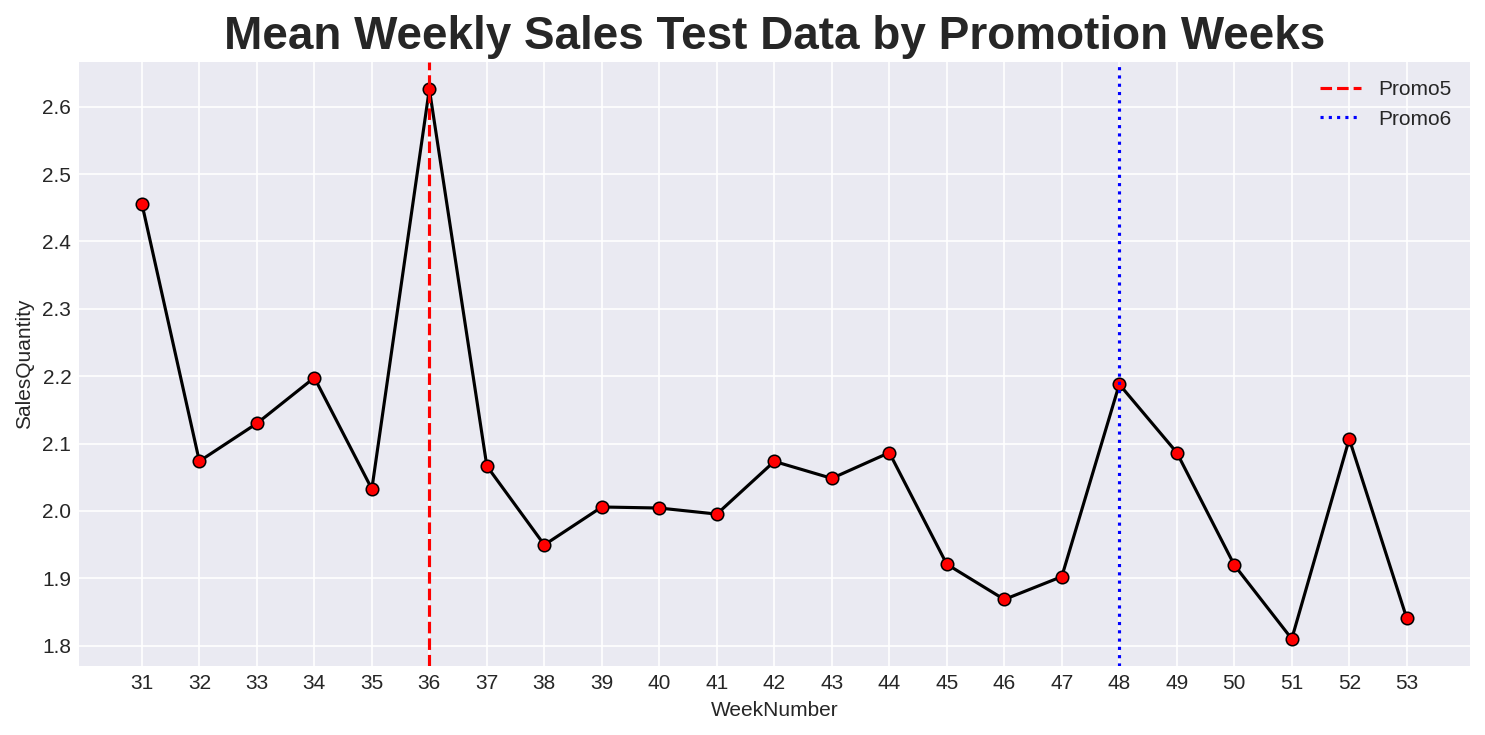

In [71]:
# Plot test data weekly mean sales:
temp = test[
    ['WeekNumber', 'SalesQuantity']
].groupby('WeekNumber', as_index=False).mean()

fig = plt.figure(figsize=(10, 5), dpi=150)
ax = fig.add_subplot()
sns.lineplot(data=temp,
             x='WeekNumber',
             y='SalesQuantity',
             color='k',
             marker='o',
             mec='k',
             mfc='r',
             ax=ax)

ax.axvline(36, ls='--', c='r', label='Promo5')
ax.axvline(48, ls=':', c='b', label='Promo6')
ax.set_title('Mean Weekly Sales Test Data by Promotion Weeks')
ax.set_xticks(range(31, 54, 1))
ax.legend()
fig.tight_layout()
plt.show()

In [72]:
# Group test data by week, store, and produt:
test = (
    test
    .groupby(by=['WeekNumber', 'StoreCode', 'ProductCode'], as_index=False)
    .mean()
)

test.head()

,WeekNumber,StoreCode,ProductCode,Date,SalesQuantity
0,31,1,23,2015-08-02,1.0000
1,31,1,37,2015-08-02,1.0000
2,31,1,41,2015-08-02,2.0000
3,31,1,75,2015-08-02,2.0000
4,31,1,80,2015-08-02,2.0000


In [73]:
# Adding IsPromoWeek dummy to the test data:
test_promo_weeks = [36, 48]
test_promo_dummy = lambda week: True if week in test_promo_weeks else False

test['IsPromoWeek'] = np.vectorize(test_promo_dummy)(test['WeekNumber'])
test['IsPromoWeek'].value_counts()

IsPromoWeek
False    576347
True      54162
Name: count, dtype: int64

In [74]:
# Merge weights:
test = (
    pd.merge(left=test,
             right=product_labels,
             on='ProductCode',
             how='left')
)

test = (
   pd.merge(left=test,
            right=store_labels,
            on='StoreCode',
            how='left') 
)

# Select only promo 5 week for test data:
test = test.query('WeekNumber == 36')
test = test.drop(columns=['WeekNumber', 'Date', 'StoreCode', 'ProductCode'])
test.head()

,SalesQuantity,IsPromoWeek,WeightedProductLabel,WeightedStoreLabel
136616,2.0000,True,Slow,Average
136617,1.0000,True,Slow,Average
136618,1.0000,True,Slow,Average
136619,0.0000,True,Slow,Average
136620,0.0000,True,Slow,Average


In [75]:
# Check test data:
test.isnull().sum()

SalesQuantity           0
IsPromoWeek             0
WeightedProductLabel    0
WeightedStoreLabel      0
dtype: int64

In [76]:
# Get the test dummies
test = pd.get_dummies(test, drop_first=True)

In [77]:
train.head()

,SalesQuantity,IsPromoWeek,WeightedProductLabel_Fast,WeightedProductLabel_Slow,WeightedStoreLabel_Fast,WeightedStoreLabel_Slow
0,1.0000,False,False,False,False,False
1,1.0000,False,False,False,False,False
2,1.0000,False,False,True,False,False
3,1.0000,False,False,False,False,False
4,1.0000,False,False,True,False,False


In [78]:
test.head()

,SalesQuantity,IsPromoWeek,WeightedProductLabel_Fast,WeightedProductLabel_Slow,WeightedStoreLabel_Fast,WeightedStoreLabel_Slow
136616,2.0000,True,False,True,False,False
136617,1.0000,True,False,True,False,False
136618,1.0000,True,False,True,False,False
136619,0.0000,True,False,True,False,False
136620,0.0000,True,False,True,False,False


In [79]:
# Export dataframes for machine learning:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)